In [1]:
from google.colab import files
import pandas as pd

# Upload *raw_albumns*
uploaded_csv = files.upload()

# Get the file name (first key in the uploaded dictionary)
file1 = list(uploaded_csv.keys())[0]

# Load the CSV file
ocr_results = pd.read_csv(file1, encoding='ISO-8859-1')

# Display first few rows
ocr_results.head()

Saving ocr_results.csv to ocr_results.csv


,Filename,DetectedText,X,Y
0,1.jpeg,i,1343,11
1,1.jpeg,a,1410,466
2,1.jpeg,ec-2022920AM,1412,556
3,10.png,100,1007,116
4,10.png,cmis,1013,196


<ipython-input-2-d6097481db5d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=text_counts.index, y=text_counts.values, palette="viridis")


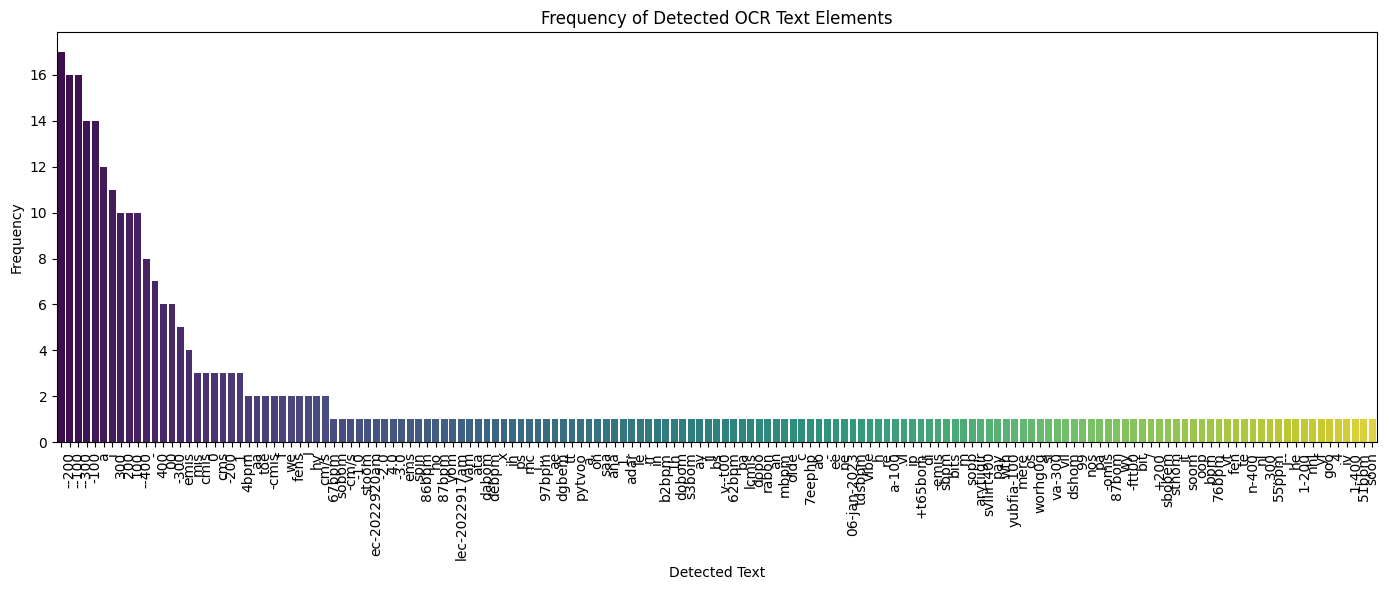

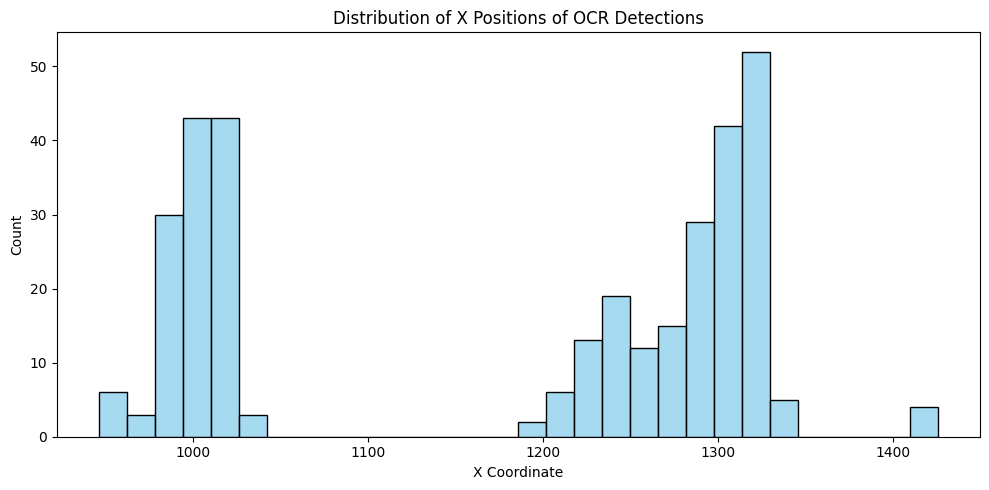

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = ocr_results

# Clean NaNs or empty text
df = df.dropna(subset=['DetectedText'])
df = df[df['DetectedText'].str.strip() != '']

# Optional: lowercase and strip text for grouping
df['DetectedText'] = df['DetectedText'].str.lower().str.strip()

# --------- PLOT 1: Bar Graph of Text Frequencies ---------
plt.figure(figsize=(14, 6))
text_counts = df['DetectedText'].value_counts()
sns.barplot(x=text_counts.index, y=text_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Frequency of Detected OCR Text Elements')
plt.xlabel('Detected Text')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --------- PLOT 2: Histogram of X Positions ---------
plt.figure(figsize=(10, 5))
sns.histplot(df['X'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of X Positions of OCR Detections')
plt.xlabel('X Coordinate')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
